In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple, Dict, Any
from rich.pretty import pprint

from pycomex.functional.experiment import Experiment

In [3]:
PATH = os.getcwd()
RESULTS_PATH = os.path.join(PATH, 'results')

# A list of identifier strings that will be matched to decide which experiments to include 
# in the evaluation. These strings can be used to differentiate between different runs of 
# an experiment.
IDENTIFIERS: List[str] = ['ex_03_a']

In [4]:
# ~ finding experiments

print('traversing experiment namespaces...')
experiment_namespace_paths: List[str] = [
    path
    for file in os.listdir(RESULTS_PATH)
    if os.path.isdir(path := os.path.join(RESULTS_PATH, file))
]
pprint(experiment_namespace_paths)

print('traversing experiment paths...')
experiment_paths: List[str] = [
    path
    for folder_path in experiment_namespace_paths
    for file in os.listdir(folder_path)
    if os.path.isdir(path := os.path.join(folder_path, file))
]
pprint(experiment_paths, max_length=10)

traversing experiment namespaces...


[
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__ens_mve__compas',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__tscore__euc',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__rep_ens',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__ens_mve__aqsoldb',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__mve',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/counterfactual_truthfulness__ens',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__tscore__tan',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/generate_logp_dataset',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__ens_mve',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__ens_mve__tadf',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__swag',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/counterfactual_truthfulness__mve',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__rand',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/counterfactual_truthfulness__ens_mve',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/counterfactual_truthfulness',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__ens_grad',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__ens',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/counterfactual_truthfulness__rand',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__ens_mve__qm9',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__ens_mve__lipop',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/test_rep_ens',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__tscore'
]

traversing experiment paths...


[
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__ens_mve__compas/05',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__ens_mve__compas/04',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__ens_mve__compas/25_09_2024__12_39__Hwdx',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__ens_mve__compas/02',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__ens_mve__compas/03',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__ens_mve__compas/01',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__tscore__euc/ex_01_a__31_01_2025__07_48__brDY',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__tscore__euc/test__30_01_2025__17_55__yGhq',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__tscore__euc/ex_01_a__31_01_2025__08_40__6b0k',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__tscore__euc/ex_01_a__31_01_2025__05_13__XulQ',
│   ... +494
]

In [5]:
import time

# ~ loading experiments
# Now that we have the paths to all the experiment archive folders, we can now actually 
# load them back into memory
experiments: List[Experiment] = []

time_start = time.time()
for path in experiment_paths:
    
    experiment_data_path = os.path.join(path, 'experiment_data.json')
    if not os.path.exists(experiment_data_path):
        print(f'no experiment data found at {experiment_data_path}')
        continue
    
    try:
        experiment = Experiment.load(path)
    except:
        continue
    
    # We want to match a specific identifier
    if 'IDENTIFIER' not in experiment.parameters or experiment.parameters['IDENTIFIER'] not in IDENTIFIERS:
        continue
    
    experiments.append(experiment)
    
time_end = time.time()
    
print(f'loaded {len(experiments)} experiments in {time_end - time_start:.1f} seconds')

no experiment data found at /media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__tscore__euc/test__30_01_2025__17_55__yGhq/experiment_data.json
no experiment data found at /media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__mve/test__01_02_2025__08_32__9UZB/experiment_data.json
no experiment data found at /media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__ens_mve/31_01_2025__09_48__uDBP/experiment_data.json
no experiment data found at /media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__ens_mve/test__05_02_2025__07_09__zUu2/experiment_data.json
no experiment data found at /media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__ens_mve/31_01_2025__09_56__qJAY/experiment_data.json
no

In [6]:
print('example experiment data:')
pprint(experiments[0].data, max_length=10)

from collections import defaultdict

# In this dict data structure, we collect the experiments that will later make up the table where the 
# key is a tuple (dataset_name, target_index) and the value is a list of experiments that match that key.
key_experiment_map: Dict[Tuple[int, str], List[Experiment]] = defaultdict(list)

for experiment in experiments:
    dataset_name = experiment.data['dataset_name']
    target_index = experiment.parameters['TARGET_INDEX']
    
    key = (dataset_name, target_index)
    key_experiment_map[key].append(experiment)
    

# Here we sort the dictionary by the keys so that the table will be nicely ordered
key_experiment_map = dict(sorted(key_experiment_map.items(), key=lambda item: (item[0][0], item[0][1])))
    
pprint(key_experiment_map, max_length=3)

example experiment data:


{
│   'dataset_name': 'compas',
│   'node_dim': 45,
│   'edge_dim': 11,
│   'target_dim': 2,
│   'indices': {
│   │   'train': [2, 4, 5, 7, 8, 9, 10, 11, 12, 14, ... +23841],
│   │   'test': [3706, 6002, 5562, 23662, 11081, 20194, 16487, 13907, 2341, 10379, ... +6804],
│   │   'val': [19356, 26486, 19689, 19778, 8788, 15763, 5456, 28759, 7960, 1265, ... +3397]
│   },
│   'test': {
│   │   'metrics': {
│   │   │   'r2': 0.8393715984904137,
│   │   │   'mse': 0.00865731085225516,
│   │   │   'mae': 0.07066645649264602,
│   │   │   'corr': 0.685283203224104,
│   │   │   'rll': 0.6083145922167575,
│   │   │   'uer_auc_mean': 0.3395243308621417,
│   │   │   'uer_auc_max': 0.38594299085824046
│   │   },
│   │   'duration': {'uncertainty': 10.17545771598816},
│   │   'values': {
│   │   │   'true': [
│   │   │   │   0.6469999999999345,
│   │   │   │   0.6720000000000255,
│   │   │   │   0.9400000000000546,
│   │   │   │   0.6069999999999709,
│   │   │   │   1.0,
│   │   │   │   0.6890000000003056,
│   │   │   │   0.91800000000012,
│   │   │   │   0.5109999999999673,
│   │   │   │   0.5610000000001492,
│   │   │   │   0.9010000000002947,
│   │   │   │   ... +6804
│   │   │   ],
│   │   │   'pred': [
│   │   │   │   0.6066193580627441,
│   │   │   │   0.707794725894928,
│   │   │   │   0.7366717457771301,
│   │   │   │   0.6059618592262268,
│   │   │   │   0.8732788562774658,
│   │   │   │   0.613725483417511,
│   │   │   │   0.7961781620979309,
│   │   │   │   0.605964183807373,
│   │   │   │   0.6149391531944275,
│   │   │   │   0.7918804287910461,
│   │   │   │   ... +6804
│   │   │   ],
│   │   │   'sigma': [
│   │   │   │   0.07265602797269821,
│   │   │   │   0.0946914404630661,
│   │   │   │   0.11433740705251694,
│   │   │   │   0.05723229795694351,
│   │   │   │   0.12281711399555206,
│   │   │   │   0.05354263633489609,
│   │   │   │   0.09100008010864258,
│   │   │   │   0.06489790976047516,
│   │   │   │   0.0843830406665802,
│   │   │   │   0.10343986004590988,
│   │   │   │   ... +6804
│   │   │   ]
│   │   }
│   }
}

{
│   ('aqsoldb', 0): [
│   │   <pycomex.functional.experiment.Experiment object at 0x7add39e45270>,
│   │   <pycomex.functional.experiment.Experiment object at 0x7add398904c0>,
│   │   <pycomex.functional.experiment.Experiment object at 0x7add381c3640>,
│   │   ... +2
│   ],
│   ('compas', 0): [
│   │   <pycomex.functional.experiment.Experiment object at 0x7add3cb99ba0>,
│   │   <pycomex.functional.experiment.Experiment object at 0x7add3b3af340>,
│   │   <pycomex.functional.experiment.Experiment object at 0x7add39e45f60>,
│   │   ... +2
│   ],
│   ('compas', 1): [
│   │   <pycomex.functional.experiment.Experiment object at 0x7add397b4310>,
│   │   <pycomex.functional.experiment.Experiment object at 0x7add39a7c6d0>,
│   │   <pycomex.functional.experiment.Experiment object at 0x7add37110d30>,
│   │   ... +2
│   ],
│   ... +6
}

In [7]:
from scipy.stats import iqr

column_names = ['Dataset', 'Target', r'$R^2 \uparrow$', r'$\rho \uparrow$', r'$\text{UER-AUC}_{mean} \uparrow$', r'$\text{UER-AUC}_{max} \uparrow$', r'$\text{RLL} \uparrow$']

rows: List[list] = []

for (dataset, target), experiments in key_experiment_map.items():
    
    row = [dataset.replace('_', ' '), str(target)]
    
    for key in ['r2', 'corr', 'uer_auc_mean', 'uer_auc_max', 'rll']:
        
        values: List[float] = []
        for experiment in experiments:
            if 'test' not in experiment.data or key not in experiment.data['test']['metrics']:
                print(f'problem with {experiment.metadata["name"]}')
                continue
            
            value = float(experiment.data['test']['metrics'][key])
            values.append(value)
        
        if key == 'rll':
            q1 = np.percentile(values, 25)
            q3 = np.percentile(values, 75)
            iqr_value = iqr(values)
            lower_bound = q1 - 1.5 * iqr_value
            upper_bound = q3 + 1.5 * iqr_value
            values = [v for v in values if lower_bound <= v <= upper_bound]
        
        row.append(values)
        
    rows.append(row)
    
    # Define the desired order of datasets
    desired_order = ['logp', 'aqsoldb', 'lipophilicity', 'compas', 'qm9']

    # Sort the rows based on the desired order
    rows.sort(key=lambda x: (desired_order.index(x[0]), int(x[1])))

    pprint(rows, max_length=5)
    
pprint(rows, max_length=5)

[
│   [
│   │   'aqsoldb',
│   │   '0',
│   │   [0.881906897624648, 0.8649540817859758, 0.850971702295027, 0.8934165817473404, 0.8764647865986573],
│   │   [0.3669516622685918, 0.3585149263898355, 0.3359620098413155, 0.4184181697265057, 0.3446688998230074],
│   │   [0.27877945209310834, 0.23911205413229952, 0.2592996677273703, 0.26143809295866255, 0.25434148262554923],
│   │   ... +2
│   ]
]

[
│   [
│   │   'aqsoldb',
│   │   '0',
│   │   [0.881906897624648, 0.8649540817859758, 0.850971702295027, 0.8934165817473404, 0.8764647865986573],
│   │   [0.3669516622685918, 0.3585149263898355, 0.3359620098413155, 0.4184181697265057, 0.3446688998230074],
│   │   [0.27877945209310834, 0.23911205413229952, 0.2592996677273703, 0.26143809295866255, 0.25434148262554923],
│   │   ... +2
│   ],
│   [
│   │   'compas',
│   │   '0',
│   │   [0.8393715984904137, 0.9424381357309983, 0.271869898698312, 0.941663620469154, 0.6970639870203521],
│   │   [0.685283203224104, 0.6364661222678535, 0.2392826875342209, 0.5874163773185064, 0.6209378435837709],
│   │   [0.3395243308621417, 0.4086132813468898, 0.12650006000755934, 0.36226512129583166, 0.2882777399521258],
│   │   ... +2
│   ]
]

[
│   [
│   │   'aqsoldb',
│   │   '0',
│   │   [0.881906897624648, 0.8649540817859758, 0.850971702295027, 0.8934165817473404, 0.8764647865986573],
│   │   [0.3669516622685918, 0.3585149263898355, 0.3359620098413155, 0.4184181697265057, 0.3446688998230074],
│   │   [0.27877945209310834, 0.23911205413229952, 0.2592996677273703, 0.26143809295866255, 0.25434148262554923],
│   │   ... +2
│   ],
│   [
│   │   'compas',
│   │   '0',
│   │   [0.8393715984904137, 0.9424381357309983, 0.271869898698312, 0.941663620469154, 0.6970639870203521],
│   │   [0.685283203224104, 0.6364661222678535, 0.2392826875342209, 0.5874163773185064, 0.6209378435837709],
│   │   [0.3395243308621417, 0.4086132813468898, 0.12650006000755934, 0.36226512129583166, 0.2882777399521258],
│   │   ... +2
│   ],
│   [
│   │   'compas',
│   │   '1',
│   │   [0.9670908014437898, 0.9191449187072653, 0.9716237444188451, 0.9692638849670339, 0.959867367464431],
│   │   [0.4962489377735322, 0.32052230190238445, 0.4168473774740194, 0.4199284202317746, 0.4007035861046168],
│   │   [0.3306188609176147, 0.18335316244523278, 0.2986193473379446, 0.31895251896917165, 0.2626478142804101],
│   │   ... +2
│   ]
]

[
│   [
│   │   'aqsoldb',
│   │   '0',
│   │   [0.881906897624648, 0.8649540817859758, 0.850971702295027, 0.8934165817473404, 0.8764647865986573],
│   │   [0.3669516622685918, 0.3585149263898355, 0.3359620098413155, 0.4184181697265057, 0.3446688998230074],
│   │   [0.27877945209310834, 0.23911205413229952, 0.2592996677273703, 0.26143809295866255, 0.25434148262554923],
│   │   ... +2
│   ],
│   [
│   │   'lipophilicity',
│   │   '0',
│   │   [0.7010992363038002, 0.6670155312138515, 0.7404459085795092, 0.738060873779583, 0.7577506339610246],
│   │   [0.1404913408421341, 0.19541304398807918, 0.279458542151738, 0.2264333560147519, 0.21680333680596534],
│   │   [0.06588014684338783, 0.09829266485671984, 0.12767968207802488, 0.08484366326134608, 0.11941284019105265],
│   │   ... +2
│   ],
│   [
│   │   'compas',
│   │   '0',
│   │   [0.8393715984904137, 0.9424381357309983, 0.271869898698312, 0.941663620469154, 0.6970639870203521],
│   │   [0.685283203224104, 0.6364661222678535, 0.2392826875342209, 0.5874163773185064, 0.6209378435837709],
│   │   [0.3395243308621417, 0.4086132813468898, 0.12650006000755934, 0.36226512129583166, 0.2882777399521258],
│   │   ... +2
│   ],
│   [
│   │   'compas',
│   │   '1',
│   │   [0.9670908014437898, 0.9191449187072653, 0.9716237444188451, 0.9692638849670339, 0.959867367464431],
│   │   [0.4962489377735322, 0.32052230190238445, 0.4168473774740194, 0.4199284202317746, 0.4007035861046168],
│   │   [0.3306188609176147, 0.18335316244523278, 0.2986193473379446, 0.31895251896917165, 0.2626478142804101],
│   │   ... +2
│   ]
]

[
│   [
│   │   'logp',
│   │   '0',
│   │   [0.9965265994687647, 0.990221481964034, 0.994130737279679, 0.9783765246950371, 0.9434416665644915],
│   │   [0.38507071992618164, 0.6802165830686587, 0.7670583374148359, 0.6009814181195781, 0.5295904005499942],
│   │   [0.24211561113563743, 0.304371455295966, 0.36503049532542914, 0.2357988288849086, 0.2641695143068638],
│   │   ... +2
│   ],
│   [
│   │   'aqsoldb',
│   │   '0',
│   │   [0.881906897624648, 0.8649540817859758, 0.850971702295027, 0.8934165817473404, 0.8764647865986573],
│   │   [0.3669516622685918, 0.3585149263898355, 0.3359620098413155, 0.4184181697265057, 0.3446688998230074],
│   │   [0.27877945209310834, 0.23911205413229952, 0.2592996677273703, 0.26143809295866255, 0.25434148262554923],
│   │   ... +2
│   ],
│   [
│   │   'lipophilicity',
│   │   '0',
│   │   [0.7010992363038002, 0.6670155312138515, 0.7404459085795092, 0.738060873779583, 0.7577506339610246],
│   │   [0.1404913408421341, 0.19541304398807918, 0.279458542151738, 0.2264333560147519, 0.21680333680596534],
│   │   [0.06588014684338783, 0.09829266485671984, 0.12767968207802488, 0.08484366326134608, 0.11941284019105265],
│   │   ... +2
│   ],
│   [
│   │   'compas',
│   │   '0',
│   │   [0.8393715984904137, 0.9424381357309983, 0.271869898698312, 0.941663620469154, 0.6970639870203521],
│   │   [0.685283203224104, 0.6364661222678535, 0.2392826875342209, 0.5874163773185064, 0.6209378435837709],
│   │   [0.3395243308621417, 0.4086132813468898, 0.12650006000755934, 0.36226512129583166, 0.2882777399521258],
│   │   ... +2
│   ],
│   [
│   │   'compas',
│   │   '1',
│   │   [0.9670908014437898, 0.9191449187072653, 0.9716237444188451, 0.9692638849670339, 0.959867367464431],
│   │   [0.4962489377735322, 0.32052230190238445, 0.4168473774740194, 0.4199284202317746, 0.4007035861046168],
│   │   [0.3306188609176147, 0.18335316244523278, 0.2986193473379446, 0.31895251896917165, 0.2626478142804101],
│   │   ... +2
│   ]
]

[
│   [
│   │   'logp',
│   │   '0',
│   │   [0.9965265994687647, 0.990221481964034, 0.994130737279679, 0.9783765246950371, 0.9434416665644915],
│   │   [0.38507071992618164, 0.6802165830686587, 0.7670583374148359, 0.6009814181195781, 0.5295904005499942],
│   │   [0.24211561113563743, 0.304371455295966, 0.36503049532542914, 0.2357988288849086, 0.2641695143068638],
│   │   ... +2
│   ],
│   [
│   │   'aqsoldb',
│   │   '0',
│   │   [0.881906897624648, 0.8649540817859758, 0.850971702295027, 0.8934165817473404, 0.8764647865986573],
│   │   [0.3669516622685918, 0.3585149263898355, 0.3359620098413155, 0.4184181697265057, 0.3446688998230074],
│   │   [0.27877945209310834, 0.23911205413229952, 0.2592996677273703, 0.26143809295866255, 0.25434148262554923],
│   │   ... +2
│   ],
│   [
│   │   'lipophilicity',
│   │   '0',
│   │   [0.7010992363038002, 0.6670155312138515, 0.7404459085795092, 0.738060873779583, 0.7577506339610246],
│   │   [0.1404913408421341, 0.19541304398807918, 0.279458542151738, 0.2264333560147519, 0.21680333680596534],
│   │   [0.06588014684338783, 0.09829266485671984, 0.12767968207802488, 0.08484366326134608, 0.11941284019105265],
│   │   ... +2
│   ],
│   [
│   │   'compas',
│   │   '0',
│   │   [0.8393715984904137, 0.9424381357309983, 0.271869898698312, 0.941663620469154, 0.6970639870203521],
│   │   [0.685283203224104, 0.6364661222678535, 0.2392826875342209, 0.5874163773185064, 0.6209378435837709],
│   │   [0.3395243308621417, 0.4086132813468898, 0.12650006000755934, 0.36226512129583166, 0.2882777399521258],
│   │   ... +2
│   ],
│   [
│   │   'compas',
│   │   '1',
│   │   [0.9670908014437898, 0.9191449187072653, 0.9716237444188451, 0.9692638849670339, 0.959867367464431],
│   │   [0.4962489377735322, 0.32052230190238445, 0.4168473774740194, 0.4199284202317746, 0.4007035861046168],
│   │   [0.3306188609176147, 0.18335316244523278, 0.2986193473379446, 0.31895251896917165, 0.2626478142804101],
│   │   ... +2
│   ],
│   ... +1
]

[
│   [
│   │   'logp',
│   │   '0',
│   │   [0.9965265994687647, 0.990221481964034, 0.994130737279679, 0.9783765246950371, 0.9434416665644915],
│   │   [0.38507071992618164, 0.6802165830686587, 0.7670583374148359, 0.6009814181195781, 0.5295904005499942],
│   │   [0.24211561113563743, 0.304371455295966, 0.36503049532542914, 0.2357988288849086, 0.2641695143068638],
│   │   ... +2
│   ],
│   [
│   │   'aqsoldb',
│   │   '0',
│   │   [0.881906897624648, 0.8649540817859758, 0.850971702295027, 0.8934165817473404, 0.8764647865986573],
│   │   [0.3669516622685918, 0.3585149263898355, 0.3359620098413155, 0.4184181697265057, 0.3446688998230074],
│   │   [0.27877945209310834, 0.23911205413229952, 0.2592996677273703, 0.26143809295866255, 0.25434148262554923],
│   │   ... +2
│   ],
│   [
│   │   'lipophilicity',
│   │   '0',
│   │   [0.7010992363038002, 0.6670155312138515, 0.7404459085795092, 0.738060873779583, 0.7577506339610246],
│   │   [0.1404913408421341, 0.19541304398807918, 0.279458542151738, 0.2264333560147519, 0.21680333680596534],
│   │   [0.06588014684338783, 0.09829266485671984, 0.12767968207802488, 0.08484366326134608, 0.11941284019105265],
│   │   ... +2
│   ],
│   [
│   │   'compas',
│   │   '0',
│   │   [0.8393715984904137, 0.9424381357309983, 0.271869898698312, 0.941663620469154, 0.6970639870203521],
│   │   [0.685283203224104, 0.6364661222678535, 0.2392826875342209, 0.5874163773185064, 0.6209378435837709],
│   │   [0.3395243308621417, 0.4086132813468898, 0.12650006000755934, 0.36226512129583166, 0.2882777399521258],
│   │   ... +2
│   ],
│   [
│   │   'compas',
│   │   '1',
│   │   [0.9670908014437898, 0.9191449187072653, 0.9716237444188451, 0.9692638849670339, 0.959867367464431],
│   │   [0.4962489377735322, 0.32052230190238445, 0.4168473774740194, 0.4199284202317746, 0.4007035861046168],
│   │   [0.3306188609176147, 0.18335316244523278, 0.2986193473379446, 0.31895251896917165, 0.2626478142804101],
│   │   ... +2
│   ],
│   ... +2
]

[
│   [
│   │   'logp',
│   │   '0',
│   │   [0.9965265994687647, 0.990221481964034, 0.994130737279679, 0.9783765246950371, 0.9434416665644915],
│   │   [0.38507071992618164, 0.6802165830686587, 0.7670583374148359, 0.6009814181195781, 0.5295904005499942],
│   │   [0.24211561113563743, 0.304371455295966, 0.36503049532542914, 0.2357988288849086, 0.2641695143068638],
│   │   ... +2
│   ],
│   [
│   │   'aqsoldb',
│   │   '0',
│   │   [0.881906897624648, 0.8649540817859758, 0.850971702295027, 0.8934165817473404, 0.8764647865986573],
│   │   [0.3669516622685918, 0.3585149263898355, 0.3359620098413155, 0.4184181697265057, 0.3446688998230074],
│   │   [0.27877945209310834, 0.23911205413229952, 0.2592996677273703, 0.26143809295866255, 0.25434148262554923],
│   │   ... +2
│   ],
│   [
│   │   'lipophilicity',
│   │   '0',
│   │   [0.7010992363038002, 0.6670155312138515, 0.7404459085795092, 0.738060873779583, 0.7577506339610246],
│   │   [0.1404913408421341, 0.19541304398807918, 0.279458542151738, 0.2264333560147519, 0.21680333680596534],
│   │   [0.06588014684338783, 0.09829266485671984, 0.12767968207802488, 0.08484366326134608, 0.11941284019105265],
│   │   ... +2
│   ],
│   [
│   │   'compas',
│   │   '0',
│   │   [0.8393715984904137, 0.9424381357309983, 0.271869898698312, 0.941663620469154, 0.6970639870203521],
│   │   [0.685283203224104, 0.6364661222678535, 0.2392826875342209, 0.5874163773185064, 0.6209378435837709],
│   │   [0.3395243308621417, 0.4086132813468898, 0.12650006000755934, 0.36226512129583166, 0.2882777399521258],
│   │   ... +2
│   ],
│   [
│   │   'compas',
│   │   '1',
│   │   [0.9670908014437898, 0.9191449187072653, 0.9716237444188451, 0.9692638849670339, 0.959867367464431],
│   │   [0.4962489377735322, 0.32052230190238445, 0.4168473774740194, 0.4199284202317746, 0.4007035861046168],
│   │   [0.3306188609176147, 0.18335316244523278, 0.2986193473379446, 0.31895251896917165, 0.2626478142804101],
│   │   ... +2
│   ],
│   ... +3
]

[
│   [
│   │   'logp',
│   │   '0',
│   │   [0.9965265994687647, 0.990221481964034, 0.994130737279679, 0.9783765246950371, 0.9434416665644915],
│   │   [0.38507071992618164, 0.6802165830686587, 0.7670583374148359, 0.6009814181195781, 0.5295904005499942],
│   │   [0.24211561113563743, 0.304371455295966, 0.36503049532542914, 0.2357988288849086, 0.2641695143068638],
│   │   ... +2
│   ],
│   [
│   │   'aqsoldb',
│   │   '0',
│   │   [0.881906897624648, 0.8649540817859758, 0.850971702295027, 0.8934165817473404, 0.8764647865986573],
│   │   [0.3669516622685918, 0.3585149263898355, 0.3359620098413155, 0.4184181697265057, 0.3446688998230074],
│   │   [0.27877945209310834, 0.23911205413229952, 0.2592996677273703, 0.26143809295866255, 0.25434148262554923],
│   │   ... +2
│   ],
│   [
│   │   'lipophilicity',
│   │   '0',
│   │   [0.7010992363038002, 0.6670155312138515, 0.7404459085795092, 0.738060873779583, 0.7577506339610246],
│   │   [0.1404913408421341, 0.19541304398807918, 0.279458542151738, 0.2264333560147519, 0.21680333680596534],
│   │   [0.06588014684338783, 0.09829266485671984, 0.12767968207802488, 0.08484366326134608, 0.11941284019105265],
│   │   ... +2
│   ],
│   [
│   │   'compas',
│   │   '0',
│   │   [0.8393715984904137, 0.9424381357309983, 0.271869898698312, 0.941663620469154, 0.6970639870203521],
│   │   [0.685283203224104, 0.6364661222678535, 0.2392826875342209, 0.5874163773185064, 0.6209378435837709],
│   │   [0.3395243308621417, 0.4086132813468898, 0.12650006000755934, 0.36226512129583166, 0.2882777399521258],
│   │   ... +2
│   ],
│   [
│   │   'compas',
│   │   '1',
│   │   [0.9670908014437898, 0.9191449187072653, 0.9716237444188451, 0.9692638849670339, 0.959867367464431],
│   │   [0.4962489377735322, 0.32052230190238445, 0.4168473774740194, 0.4199284202317746, 0.4007035861046168],
│   │   [0.3306188609176147, 0.18335316244523278, 0.2986193473379446, 0.31895251896917165, 0.2626478142804101],
│   │   ... +2
│   ],
│   ... +4
]

[
│   [
│   │   'logp',
│   │   '0',
│   │   [0.9965265994687647, 0.990221481964034, 0.994130737279679, 0.9783765246950371, 0.9434416665644915],
│   │   [0.38507071992618164, 0.6802165830686587, 0.7670583374148359, 0.6009814181195781, 0.5295904005499942],
│   │   [0.24211561113563743, 0.304371455295966, 0.36503049532542914, 0.2357988288849086, 0.2641695143068638],
│   │   ... +2
│   ],
│   [
│   │   'aqsoldb',
│   │   '0',
│   │   [0.881906897624648, 0.8649540817859758, 0.850971702295027, 0.8934165817473404, 0.8764647865986573],
│   │   [0.3669516622685918, 0.3585149263898355, 0.3359620098413155, 0.4184181697265057, 0.3446688998230074],
│   │   [0.27877945209310834, 0.23911205413229952, 0.2592996677273703, 0.26143809295866255, 0.25434148262554923],
│   │   ... +2
│   ],
│   [
│   │   'lipophilicity',
│   │   '0',
│   │   [0.7010992363038002, 0.6670155312138515, 0.7404459085795092, 0.738060873779583, 0.7577506339610246],
│   │   [0.1404913408421341, 0.19541304398807918, 0.279458542151738, 0.2264333560147519, 0.21680333680596534],
│   │   [0.06588014684338783, 0.09829266485671984, 0.12767968207802488, 0.08484366326134608, 0.11941284019105265],
│   │   ... +2
│   ],
│   [
│   │   'compas',
│   │   '0',
│   │   [0.8393715984904137, 0.9424381357309983, 0.271869898698312, 0.941663620469154, 0.6970639870203521],
│   │   [0.685283203224104, 0.6364661222678535, 0.2392826875342209, 0.5874163773185064, 0.6209378435837709],
│   │   [0.3395243308621417, 0.4086132813468898, 0.12650006000755934, 0.36226512129583166, 0.2882777399521258],
│   │   ... +2
│   ],
│   [
│   │   'compas',
│   │   '1',
│   │   [0.9670908014437898, 0.9191449187072653, 0.9716237444188451, 0.9692638849670339, 0.959867367464431],
│   │   [0.4962489377735322, 0.32052230190238445, 0.4168473774740194, 0.4199284202317746, 0.4007035861046168],
│   │   [0.3306188609176147, 0.18335316244523278, 0.2986193473379446, 0.31895251896917165, 0.2626478142804101],
│   │   ... +2
│   ],
│   ... +4
]

In [8]:
# ~ Generating the latex table

from truthful_counterfactuals.utils import render_latex
from truthful_counterfactuals.utils import latex_table

# ~ rendering latex

tex_content, tex_table = latex_table(
    column_names=column_names,
    rows=rows
)
print(tex_table)

tex_path = os.path.join(PATH, '_results_ex_03.tex')
with open(tex_path, 'w') as file:
    file.write(tex_table)

pdf_path = os.path.join(PATH, '_results_ex_03.pdf')
render_latex({'content': tex_table}, pdf_path)

\begin{tabular}{ ccccccc }
% -- table header --
\toprule
Dataset &
Target &
$R^2 \uparrow$ &
$\rho \uparrow$ &
$\text{UER-AUC}_{mean} \uparrow$ &
$\text{UER-AUC}_{max} \uparrow$ &
$\text{RLL} \uparrow$ \\

\midrule
% -- table content --
% row 1
logp &
0 &
$0.98 {\color{gray} \pm \mathsmaller{ 0.02 } }$ &
$0.59 {\color{gray} \pm \mathsmaller{ 0.13 } }$ &
$0.28 {\color{gray} \pm \mathsmaller{ 0.05 } }$ &
$0.67 {\color{gray} \pm \mathsmaller{ 0.22 } }$ &
$0.75 {\color{gray} \pm \mathsmaller{ 0.04 } }$ 
\\
% row 2
aqsoldb &
0 &
$0.87 {\color{gray} \pm \mathsmaller{ 0.01 } }$ &
$0.36 {\color{gray} \pm \mathsmaller{ 0.03 } }$ &
$0.26 {\color{gray} \pm \mathsmaller{ 0.01 } }$ &
$0.33 {\color{gray} \pm \mathsmaller{ 0.05 } }$ &
$0.42 {\color{gray} \pm \mathsmaller{ 0.06 } }$ 
\\
% row 3
lipophilicity &
0 &
$0.72 {\color{gray} \pm \mathsmaller{ 0.03 } }$ &
$0.21 {\color{gray} \pm \mathsmaller{ 0.05 } }$ &
$0.10 {\color{gray} \pm \mathsmaller{ 0.02 } }$ &
$0.20 {\color{gray} \pm \mathsmaller{ 0.

num experiments: 45


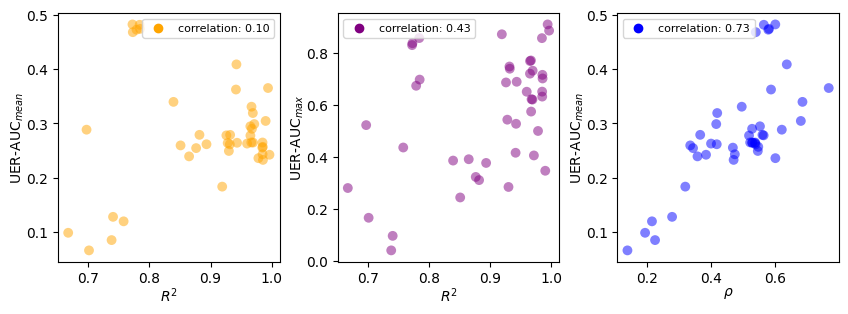

In [28]:
import matplotlib.pyplot as plt

plt.style.use('default')

experiments = [experiment for experiments in key_experiment_map.values() for experiment in experiments]
print('num experiments:', len(experiments))


fig, (ax_mean, ax_max, ax_corr) = plt.subplots(1, 3, figsize=(8.5, 3))
fig.tight_layout(pad=0.8)

r2_values = []
corr_values = []
auc_mean_values = []
auc_max_values = []

for experiment in experiments:
    
    r2 = experiment['test/metrics/r2']
    corr = experiment['test/metrics/corr']
    auc_mean = experiment['test/metrics/uer_auc_mean']
    auc_max = experiment['test/metrics/uer_auc_max']
    if r2 < 0.3:
        continue
    
    r2_values.append(r2)
    corr_values.append(corr)
    auc_mean_values.append(auc_mean)
    auc_max_values.append(auc_max)
    
    ax_mean.scatter(r2, auc_mean, color='orange', edgecolors='none', alpha=0.5, s=50)
    ax_max.scatter(r2, auc_max, color='purple', edgecolors='none', alpha=0.5, s=50)
    ax_corr.scatter(corr, auc_mean, color='blue', edgecolors='none', alpha=0.5, s=50)

labelpad = 0

corr_mean = np.corrcoef(r2_values, auc_mean_values)[0, 1]
#ax_mean.set_xlim(0, 1)
#ax_mean.set_ylim(0, 1)
ax_mean.set_ylabel(r'$\text{UER-AUC}_{mean}$', labelpad=labelpad)
ax_mean.set_xlabel(r'$R^2$', labelpad=labelpad)
ax_mean.scatter([], [], color='orange', label=f'correlation: {corr_mean:.2f}')
ax_mean.legend(fontsize=8)

corr_max = np.corrcoef(r2_values, auc_max_values)[0, 1]
#ax_max.set_xlim(0, 1)
#ax_max.set_ylim(0, 1)
ax_max.set_ylabel(r'$\text{UER-AUC}_{max}$', labelpad=labelpad)
ax_max.set_xlabel(r'$R^2$', labelpad=labelpad)
ax_max.scatter([], [], color='purple', label=f'correlation: {corr_max:.2f}')
ax_max.legend(fontsize=8)

corr_corr = np.corrcoef(corr_values, auc_mean_values)[0, 1]
#ax_corr.set_xlim(0, 1)
#ax_corr.set_ylim(0, 1)
ax_corr.set_xlabel(r'$\rho$', labelpad=labelpad)
ax_corr.set_ylabel(r'$\text{UER-AUC}_{mean}$', labelpad=labelpad)
ax_corr.scatter([], [], color='blue', label=f'correlation: {corr_corr:.2f}')
ax_corr.legend(fontsize=8)

fig.show()
fig